# Insights

In [1]:
# Report Types
!ls ../reports/Assignment-1/seed0*.txt

../reports/Assignment-1/seed0_ContactsPerHourReport.txt
../reports/Assignment-1/seed0_CovidStatsReport.txt
../reports/Assignment-1/seed0_CovidTransmissionReport.txt
../reports/Assignment-1/seed0_EncountersVSUniqueEncountersReport.txt
../reports/Assignment-1/seed0_MessageGraphvizReport.txt
../reports/Assignment-1/seed0_NodeDensityReport.txt
../reports/Assignment-1/seed0_TotalContactTimeReport.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({
    'font.size': 16,
    'figure.figsize': [12, 8]
})

SEED_NUM = 10
MASK_TYPES = {
    "B": 13, 
    "M": 33, 
    "N": 20
}
MASK_NAMES = {
    "B": "Bare (no mask)",
    "M": "Surgical Mask",
    "N": "N95 Mask"
}

## CovidTransmissionReport

In [3]:
ct_dfs = []

for i in range(SEED_NUM):
     ct_dfs.append(pd.read_csv(f"../reports/Assignment-1/seed{i}_CovidTransmissionReport.txt", sep="|"))

### How long does a virus travel?

In [4]:
unique_transmission_max = []
unique_transmission_min = []

for df in ct_dfs:
    unique_transmission_max.append(df.message_id.value_counts().max())
    unique_transmission_min.append(df.message_id.value_counts().min())
    
print(f"Max infected people from the same source: {np.mean(unique_transmission_max)}")
print(f"Min infected people from the same source: {np.mean(unique_transmission_min)}")

Max infected people from the same source: 13.3
Min infected people from the same source: 2.4


### Transmission Percentages over Mask Types

In [5]:
mask_stats = {m: [] for m in MASK_TYPES.keys()}

for df in ct_dfs:
    ms, cts = np.unique([
        p[1] for p in np.unique(df['from'].values.tolist() + df['to'].values.tolist()) if p[0] in ["M", "S"]
    ], return_counts=True)

    transmitted_people = {m: ct for m, ct in zip(ms, cts)}

    for k in MASK_TYPES.keys():
        mask_stats[k].append(transmitted_people[k] / MASK_TYPES[k])
        
for k, v in mask_stats.items():
    print(f"{MASK_NAMES[k]} \t - transmitted ratio: \t {np.mean(v)*100:.2f}%")

Bare (no mask) 	 - transmitted ratio: 	 100.00%
Surgical Mask 	 - transmitted ratio: 	 26.36%
N95 Mask 	 - transmitted ratio: 	 12.00%


### Transmission Percentages over Student Types

In [5]:
student_stats = {s: [] for s in ["S2M", "M2M", "M2S", "S2S"]}

for df in ct_dfs:
    df["btween_students"] = df.apply(lambda x: f"{x['from'][0]}2{x['to'][0]}")
    ss, cts = np.unique(df["btween_students"], return_counts=True)

    transmitted_people = {m: ct for m, ct in zip(ms, cts)}

    for k in MASK_TYPES.keys():
        mask_stats[k].append(transmitted_people[k] / MASK_TYPES[k])
        
for k, v in mask_stats.items():
    print(f"{MASK_NAMES[k]} \t - transmitted ratio: \t {np.mean(v)*100:.2f}%")

Bare (no mask) 	 - transmitted ratio: 	 100.00%
Surgical Mask 	 - transmitted ratio: 	 26.36%
N95 Mask 	 - transmitted ratio: 	 12.00%


### COVID-19 Transmission over Time

In [12]:
# global_day_info = {i: np.zeros(SEED_NUM) for i in range(1, 8)}

# for i, df in enumerate(ct_dfs):
#     df['days'] = df.creation_time.apply(lambda x: x // 86400 + 1) # 1 day 86400 seconds

#     day_info = np.unique(df.days.values, return_counts=True)
    
# #     print(day_info)

#     for k, v in zip(day_info[0], day_info[1]):
#         global_day_info[k][i] = v
    
# global_day_info = [np.mean(global_day_info[i]) for i in range(1, 8)]
    
# plt.title("COVID-19 Transmission over Time")
# plt.xlabel('day')
# plt.ylabel('# COVID-19 Transmission')


# plt.plot(global_day_info)
# plt.show()

### Section Pie Chart

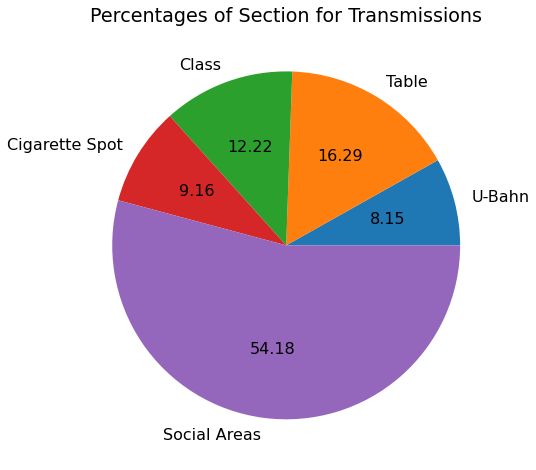

In [16]:
section_stats = {s: [] for s in ["U-Bahn", "Table", "Class", "Cigarette Spot", "Walking Areas"]}

for df in ct_dfs:
    df['section_new'] = df.section.apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

    section_info = np.unique(df.section_new.values, return_counts=True)
    
    for k, v in zip(section_info[0], section_info[1]):
        section_stats[k.strip()].append(v)

section_stats = {k: np.mean(v) for k, v in section_stats.items()}

new_section_stats = {}
for k, v in section_stats.items():
    if k == "Walking Areas":
        new_section_stats["Social Areas"] = v
        continue
    
    new_section_stats[k] = v

section_stats = new_section_stats

plt.title("Percentages of Section for Transmissions")
plt.pie(section_stats.values(), labels=section_stats.keys(), autopct='%.2f')
plt.show()

## EncountersVSUniqueEncountersReport

Min # of close contacts per person:	 89.00 times
Mean # of close contacts per person:	 331.80 times
Max # of close contacts per person:	 740.00 times


<AxesSubplot:>

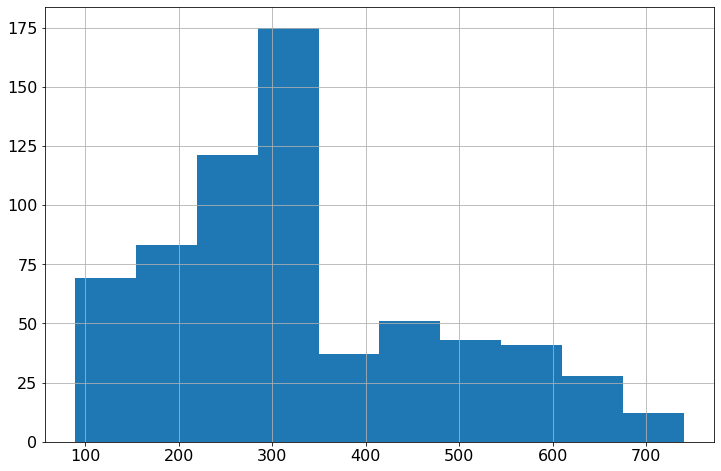

In [26]:
e_dfs = []

for i in range(SEED_NUM):
    df = pd.read_csv(f"../reports/Assignment-1/seed{i}_EncountersVSUniqueEncountersReport.txt", sep="\t", header=None)
    df.columns = ["node_id", "encounter", "_"]
    df = df[(df.encounter != 0) & (df["_"] != 0)].reset_index(drop=True)
    e_dfs.append(df)
    
all_dfs = pd.concat(e_dfs).reset_index(drop=True)

print(f"Min # of close contacts per person:\t {np.min(all_dfs.encounter.values):.2f} times")
print(f"Mean # of close contacts per person:\t {np.mean(all_dfs.encounter.values):.2f} times")
print(f"Max # of close contacts per person:\t {np.max(all_dfs.encounter.values):.2f} times")

all_dfs.encounter.hist()

### TotalContactTimeReport

In [ ]:
tc_stats = []

for i in range(SEED_NUM):
    info = pd.read_csv(f"../reports/Assignment-1/seed{i}_TotalContactTimeReport.txt", sep=" ", header=None, skiprows=1).iloc[-1].values
    tc_stats.append(float(info[-1]) /  * float(info[0]))

print(f"The students contact time ratio {np.mean(tc_stats) * 100:.5f}%")